## Classification ##

### DecisionTreeClassifier ###

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples:

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [2]:
clf.predict([[2., 2.]])

array([1])

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

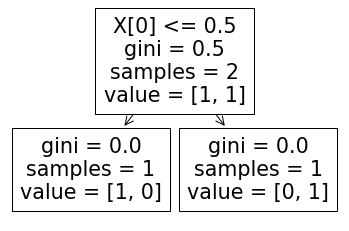

In [4]:
tree.plot_tree(clf)

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Regression ##

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:

In [6]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])


array([0.5])

### Multi-output problems ### 

A multi-output problem is a supervised learning problem with several outputs to predict, that is when Y is a 2d array of shape (n_samples, n_outputs).

#### When there is no correlation between the outputs, a very simple way to solve this kind of problem is to build n independent models, i.e. one for each output, and then to use those models to independently predict each one of the n outputs.

However, because it is likely that the output values related to the same input are themselves correlated, an often better way is to build a single model capable of predicting simultaneously all n outputs. First, it requires lower training time since only a single estimator is built. Second, the generalization accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to support multi-output problems. This requires the following changes:

    Store n output values in leaves, instead of 1;
    Use splitting criteria that compute the average reduction across all n outputs.

This module offers support for multi-output problems by implementing this strategy in both DecisionTreeClassifier and DecisionTreeRegressor. If a decision tree is fit on an output array Y of shape (n_samples, n_outputs) then the resulting estimator will:
    
    Output n_output values upon predict;
    Output a list of n_output arrays of class probabilities upon predict_proba.

The use of multi-output trees for regression is demonstrated in Multi-output Decision Tree Regression. In this example, the input X is a single real value and the outputs Y are the sine and cosine of X.

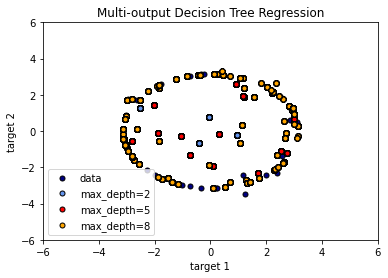

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += 0.5 - rng.rand(20, 2)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

# Plot the results
plt.figure()
s = 25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")
plt.scatter(
    y_1[:, 0],
    y_1[:, 1],
    c="cornflowerblue",
    s=s,
    edgecolor="black",
    label="max_depth=2",
)
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s, edgecolor="black", label="max_depth=5")
plt.scatter(
    y_3[:, 0], y_3[:, 1], c="orange", s=s, edgecolor="black", label="max_depth=8"
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="best")
plt.show()
